In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

The inverse logit function, also known as the sigmoid S function.

In [3]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

We need to maximize the log-likelihood.
This is equivalent to minimizing the negative log-likelihood.

In [4]:
def negative_log_likelihood(c, x, y):
    a = c[0] + (c[1] * x)
    p = sigmoid(a)
    log_likelihood = np.sum(np.log(p[y==1])) + np.sum(np.log(1 - p[y==0]))
    return -log_likelihood

Generate training data: 50 data points for class 0, and 50 data points for class 1.

In [5]:
x_class_0 = np.random.normal(0, 1, 50) - 1
x_class_1 = np.random.normal(0, 1, 50) + 1
x_train = np.concatenate([x_class_0, x_class_1])

y_class_0 = np.zeros((50))
y_class_1 = np.ones((50))
y_train = np.concatenate([y_class_0, y_class_1])

Minimize the negative_log_likelihood function with respect to the parameters c, i.e., find the maximum likelihood estimate (MLE) for the parameters c.

In [6]:
start_params = np.array([1, 1])
result = minimize(negative_log_likelihood, start_params, args=(x_train, y_train), method='BFGS', options={'gtol': 1e-6, 'disp': False})
c = result.x

Generate 30 data points as test data.

In [7]:
x_test = np.random.normal(0, 1, 30) * 2
y_test = np.zeros((30))

Classify the test data.

In [8]:
a = c[0] + c[1] * x_test
p = sigmoid(a)
classify = lambda x: int(x > 0.5)
predictions = list(map(classify, p))

Create colors for the two classes.

In [9]:
colors = ['r', 'b']

f = lambda x: colors[int(x)]

colors_train = list(map(f, y_train))
colors_predictions = list(map(f, predictions))

Plot the training data.

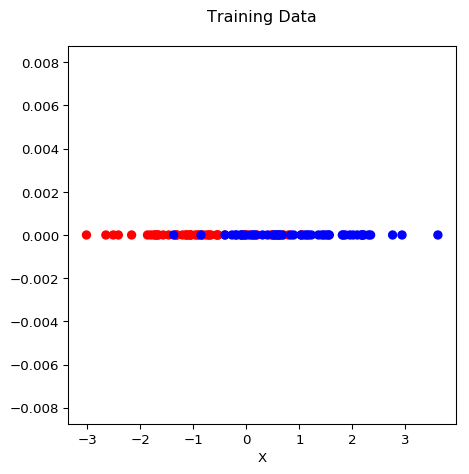

In [10]:
my_dpi = 96
plt.figure(figsize=(500/my_dpi, 500/my_dpi), dpi=my_dpi)

plt.xlabel('X')
plt.title('Training Data\n')

y_plot = np.zeros((100))
plt.scatter(x_train, y_plot, color=colors_train)
plt.show()

Find the value of x where the sigmoid has value 0.5.

In [11]:
decision_boundary_x = -(c[0] / c[1])

Create data points for the learned sigmoid function, so that we can plot it.

In [12]:
def sigmoid2(x):
    a = c[0] + c[1] * x
    return 1 / (1 + np.exp(-a))

sigx = np.arange(-5, 5, 0.1)
sigy = list(map(sigmoid2, sigx))

Plot the test data, the learned sigmoid, and the vertical decision boundary.

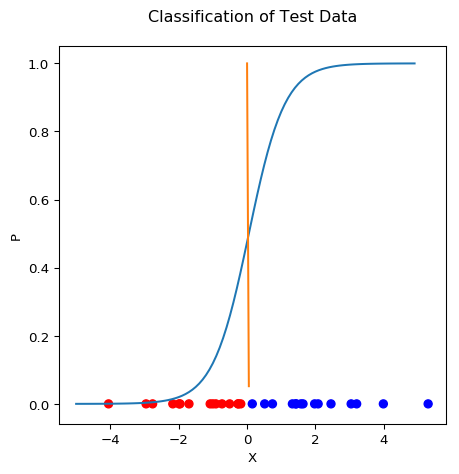

In [13]:
my_dpi = 96
plt.figure(figsize=(500/my_dpi, 500/my_dpi), dpi=my_dpi)

plt.xlabel('X')
plt.ylabel('P')
plt.title('Classification of Test Data\n')

plt.scatter(x_test, y_test, color=colors_predictions)
plt.plot(sigx, sigy)
plt.plot([decision_boundary_x, 0], [decision_boundary_x, 1])
plt.show()